<a href="https://colab.research.google.com/github/aswinjayan94/EIP/blob/master/EIP_Assignment_1_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

import math

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train_og, y_train), (X_test_og, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


NameError: ignored

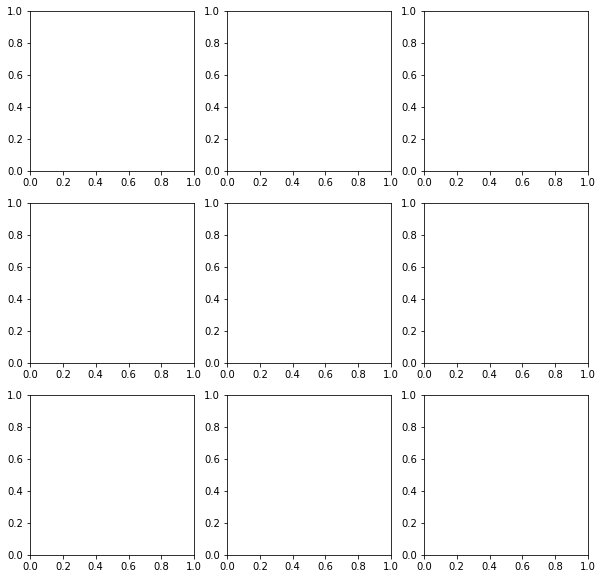

In [4]:
print (X_train_og.shape)
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(10)
sample_num =[math.floor(x) for x in np.random.uniform(size=9)*X_train.shape[0]]
fig.suptitle("Sample Images from the training set")
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(X_train_og[sample_num[i*3+j]])

In [0]:
X_train = X_train_og.reshape(X_train_og.shape[0], 28, 28,1)
X_test = X_test_og.reshape(X_test_og.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#26
model.add(Convolution2D(64, 3, 3, activation='relu'))
#24
model.add(Convolution2D(128, 3, 3, activation='relu'))
#22
model.add(MaxPooling2D())
#11
model.add(Convolution2D(32, 3, 3, activation='relu'))
#9
model.add(Convolution2D(64, 3, 3, activation='relu'))
#7
model.add(Convolution2D(64, 3, 3, activation='relu'))
#5
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 9, 9, 32)          36896     
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 5, 5, 64)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Upda

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 43s 720us/step - loss: 0.1346 - acc: 0.9579
Epoch 2/20
60000/60000 [==============================] - 39s 656us/step - loss: 0.0445 - acc: 0.9861
Epoch 3/20
60000/60000 [==============================] - 39s 643us/step - loss: 0.0331 - acc: 0.9895
Epoch 4/20
60000/60000 [==============================] - 38s 636us/step - loss: 0.0264 - acc: 0.9919
Epoch 5/20
60000/60000 [==============================] - 38s 637us/step - loss: 0.0199 - acc: 0.9939
Epoch 6/20
60000/60000 [==============================] - 38s 639us/step - loss: 0.0173 - acc: 0.9946
Epoch 7/20
60000/60000 [==============================] - 38s 631us/step - loss: 0.0134 - acc: 0.9955
Epoch 8/20
60000/60000 [==============================] - 37s 625us/step - loss: 0.0130 - acc: 0.9959
Epoch 9/20
60000/60000 [==============================] - 37s 623us/step - loss: 0.0112 - acc: 0.9964
Epoch 10/20
60000/60000 [==============================] - 36s 605us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03651899147878089, 0.9916]


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.41397052e-29 0.00000000e+00 4.98297827e-26 4.37900753e-22
  0.00000000e+00 9.57864091e-32 0.00000000e+00 1.00000000e+00
  6.05509486e-29 5.71213796e-27]
 [9.79395622e-29 1.19645549e-22 1.00000000e+00 2.09138805e-36
  1.30547335e-33 0.00000000e+00 9.65701558e-23 0.00000000e+00
  9.91971471e-32 0.00000000e+00]
 [4.05948400e-27 1.00000000e+00 7.44717614e-16 1.71520686e-26
  1.80609347e-10 5.98751581e-15 3.29414272e-23 2.11411422e-12
  2.69504009e-15 1.51477809e-28]
 [1.00000000e+00 0.00000000e+00 7.85265593e-23 0.00000000e+00
  3.55798194e-34 7.67408754e-30 2.90143423e-29 6.01949260e-28
  1.47127505e-26 1.11054032e-23]
 [1.26459947e-32 0.00000000e+00 2.29952562e-37 8.68285166e-38
  1.00000000e+00 0.00000000e+00 0.00000000e+00 2.66610334e-29
  2.14613546e-36 2.88989312e-20]
 [1.86374282e-27 1.00000000e+00 3.91958525e-15 1.03890131e-27
  1.89432003e-09 5.26652909e-18 7.78525739e-28 1.44408804e-10
  1.80634371e-15 1.03252455e-27]
 [0.00000000e+00 1.91499668e-29 3.73423111e-32 0.00000000e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

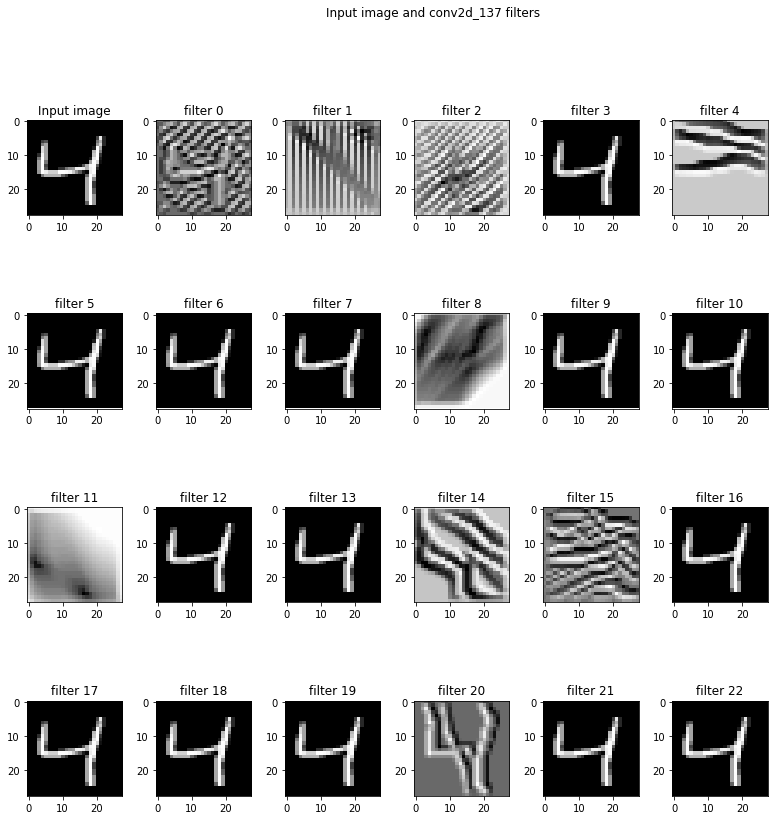

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_137')